In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from consumption_saving import *

In [3]:
from Model import ReferenceDependenceClass
model = ReferenceDependenceClass()

In [4]:
value_function_employment(model.par, model.sol)

In [5]:
model.sol.a_next_e[-1,0,:]

array([-2.00000000e+00, -1.89662910e+00, -1.79136616e+00, -1.68610322e+00,
       -1.58084028e+00, -1.47557734e+00, -1.37031440e+00, -1.26505147e+00,
       -1.15978853e+00, -1.05452559e+00, -9.49262651e-01, -8.43999712e-01,
       -7.38736774e-01, -6.33473835e-01, -5.28210897e-01, -4.22947959e-01,
       -3.17685020e-01, -2.12422082e-01, -1.07159143e-01, -1.89620512e-03])

In [6]:
print(np.shape(model.par.V_e_t_a))
model.par.V_e_t_a[:,0]

(41, 20)


array([-4.40400578, -4.10078072, -3.81916331, -3.56058747, -3.32663143,
       -3.11903768, -2.93973659, -2.79087449, -2.67484706, -2.59433954,
       -2.55237534, -2.30826762, -2.07903781, -1.86602328, -1.6707526 ,
       -1.49498494, -1.34076054, -1.21046638, -1.10692277, -1.03350008,
       -0.99427937, -0.85000048, -0.71410322, -0.58736795, -0.47069898,
       -0.36515465, -0.27198782, -0.19270166, -0.12912869, -0.08354644,
       -0.05885383, -0.05885383, -0.05885383, -0.05885383, -0.05885383,
       -0.05885383, -0.05885383, -0.05885383, -0.05885383, -0.05885383,
       -0.05885383])

In [7]:
print(np.shape(model.par.V_e))
model.par.V_e[-1,:,-1]

(41, 20, 20)


array([ 4.26598598e+00,  3.36101920e+00,  2.59462907e+00,  1.94977748e+00,
        1.41316963e+00,  9.74143861e-01,  6.23961072e-01,  3.55328734e-01,
        1.62070008e-01,  3.88866078e-02, -1.88156067e-02, -1.50577615e-02,
       -1.17156980e-02, -8.78985432e-03, -6.28066907e-03, -4.18858125e-03,
       -2.51403032e-03, -1.25745616e-03, -4.19299129e-04,  0.00000000e+00])

In [8]:
V_u,s = unemployment_ss(model.par, -1,-1)
print(V_u,s)

bellman_difference(-1) = 0.46846800829712953
bellman_difference(1) = -0.3850236455195324
-0.019120574402328318 0.42808214429003055


In [9]:
solve_search_and_consumption(model.par, model.sol)

bellman_difference(-1) = -0.8821197086049375
bellman_difference(1) = -0.8723724723827881
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.8821197086049375, -0.9271461404938627
Trying interval [-5, 0] with function values 0.29598701895076296, -0.9271461404938627
Found valid interval: [-5, 0] with function values 0.29598701895076296, -0.9271461404938627
bellman_difference(-1) = -0.8821197086049375
bellman_difference(1) = -0.8723724723827881
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.8821197086049375, -0.9271461404938627
Trying interval [-5, 0] with function values 0.29598701895076296, -0.9271461404938627
Found valid interval: [-5, 0] with function values 0.29598701895076296, -0.9271461404938627
bellman_difference(-1) = -0.8653257937606571
bellman_difference(1) = -0.8873443075375929
The function 

In [10]:
model.sol.s[-3,:]

array([0.42964213, 0.42964204, 0.42964197, 0.39873735, 0.39050004,
       0.38325556, 0.3762939 , 0.37424627, 0.37019054, 0.36980509,
       0.36919737, 0.37043373, 0.37081058, 0.37684873, 0.37678785,
       0.37672626, 0.37666466, 0.37660306, 0.37654147, 0.37647989])

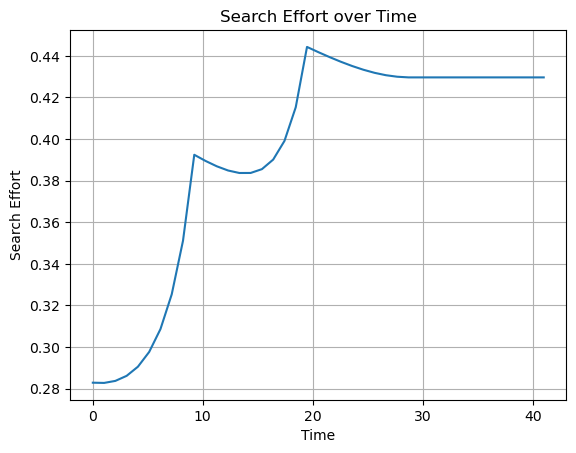

In [11]:
import matplotlib.pyplot as plt

# Assuming solve_search_effort returns a tuple where the first element is the time array and the second element is the search effort array
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0])
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.show()


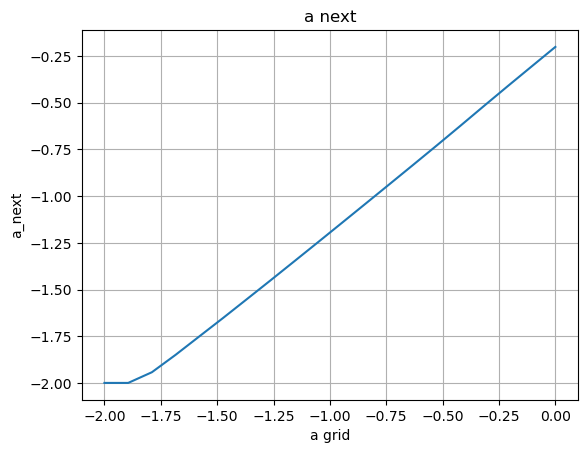

In [12]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:])
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next')
plt.grid(True)
plt.show()


In [13]:
model1 = model.copy()
# model1.par.L = -0.00
# model1.par.a_grid = np.linspace(model1.par.L, model1.par.A_0, 20)
model1.par.euler = False

In [14]:
value_function_employment(model1.par, model1.sol)

In [15]:
solve_search_and_consumption(model1.par, model1.sol)

bellman_difference(-1) = -0.8640364640080809
bellman_difference(1) = -0.8894304633784869
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.8640364640080809, -0.926633513693284
Trying interval [-5, 0] with function values 0.38435273473273046, -0.926633513693284
Found valid interval: [-5, 0] with function values 0.38435273473273046, -0.926633513693284
bellman_difference(-1) = -0.8640364640080809
bellman_difference(1) = -0.8894304633784869
The function does not have different signs at the endpoints. Trying to find a valid interval...
Trying interval [-1, 0] with function values -0.8640364640080809, -0.926633513693284
Trying interval [-5, 0] with function values 0.38435273473273046, -0.926633513693284
Found valid interval: [-5, 0] with function values 0.38435273473273046, -0.926633513693284
bellman_difference(-1) = -0.8349312645874969
bellman_difference(1) = -0.9065881830607323
The function does n

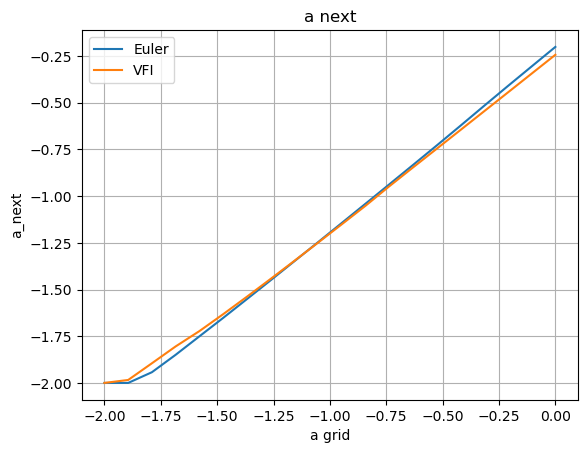

In [16]:

plt.plot(model.par.a_grid, model.sol.a_next[0,:], label='Euler')
plt.plot(model1.par.a_grid, model1.sol.a_next[0,:], label='VFI')
plt.xlabel('a grid')
plt.ylabel('a_next')
plt.title('a next')
plt.legend()
plt.grid(True)
plt.show()


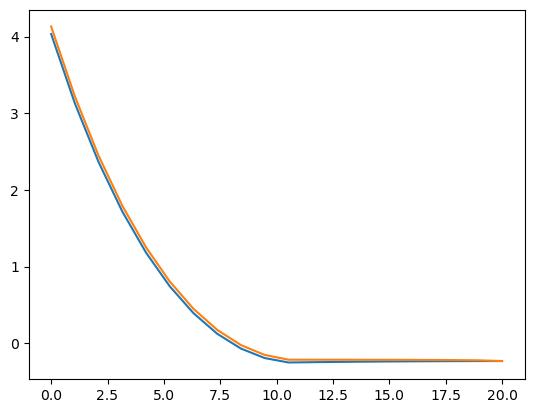

In [17]:
time = np.linspace(0, model1.par.N + model1.par.M, model1.par.N + model1.par.M)
n = np.linspace(0, model1.par.N+model.par.M, model1.par.N+model.par.M)
plt.plot(time, model.par.V_e[-1,:,18])
plt.plot(time, model1.par.V_e[-1,:,18])

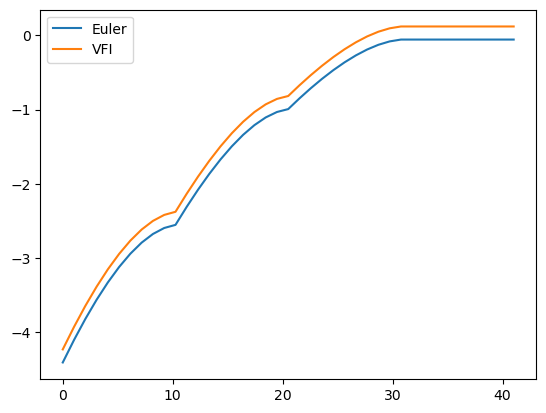

In [29]:
time = np.linspace(0, model1.par.T, model1.par.T)
n = np.linspace(0, model1.par.N+model.par.M, model1.par.N+model.par.M)
plt.plot(time, model.par.V_e[:,0,0], label='Euler')
plt.plot(time, model1.par.V_e[:,0,0], label='VFI')
plt.legend()

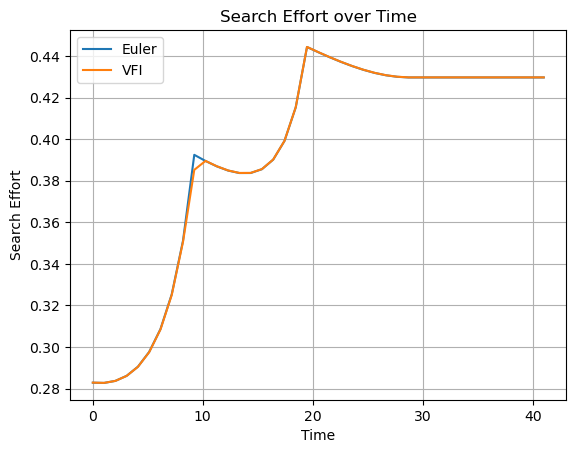

In [19]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sol.s[:model.par.T,0], label='Euler')
plt.plot(time, model1.sol.s[:model1.par.T,0], label='VFI')
plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
solve_forward(model.par, model.sol, model.sim)

In [21]:
solve_forward(model1.par, model1.sol, model1.sim)

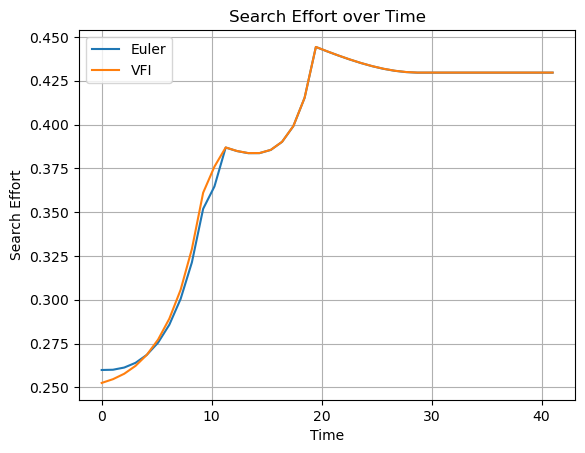

In [28]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s[:model.par.T], label='Euler')
plt.plot(time, model1.sim.s[:model.par.T], label='VFI')

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()


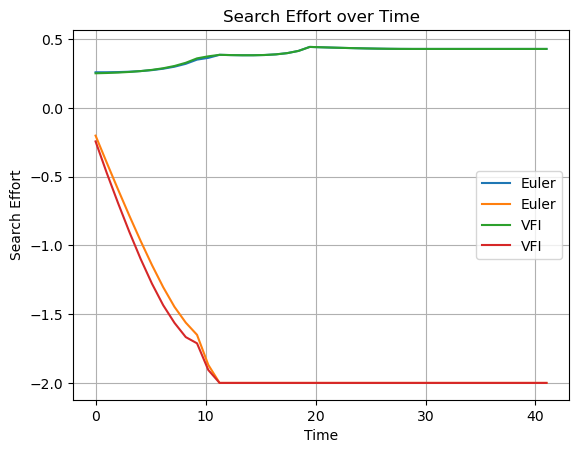

In [27]:
time = np.linspace(0, model.par.T, model.par.T)
plt.plot(time, model.sim.s, label='Euler')
plt.plot(time, model.sim.a_next, label='Euler')
plt.plot(time, model1.sim.s, label='VFI')
plt.plot(time, model1.sim.a_next, label='VFI')

plt.xlabel('Time')
plt.ylabel('Search Effort')
plt.title('Search Effort over Time')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
solve_forward_employment(model.par, model.sol, model.sim)

In [25]:
solve_forward_employment(model1.par, model1.sol, model1.sim)

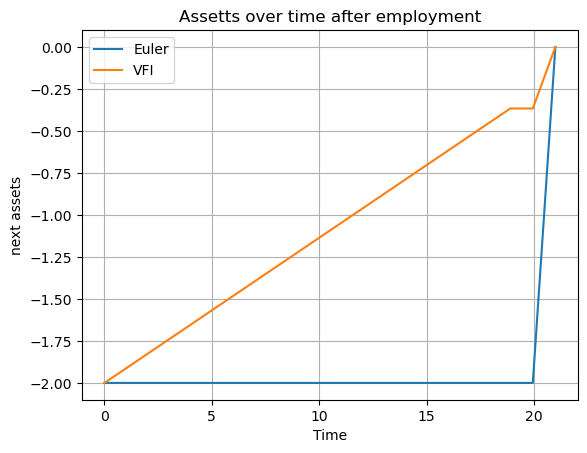

In [26]:
time = np.linspace(0, model.par.N+model.par.M+1, model.par.N+model.par.M+1)
plt.plot(time, model.sim.a_e[-1,:], label='Euler')
plt.plot(time, model1.sim.a_e[-1,:], label='VFI')


plt.xlabel('Time')
plt.ylabel('next assets')
plt.title('Assetts over time after employment')
plt.grid(True)
plt.legend()
plt.show()